<h1 align="center"> Statistics and Financial Data Analysis </h1>



In [1]:
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math as m
import scipy as sp
import datetime
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
start = datetime.datetime(2001, 1, 1)
end = datetime.datetime(2019, 1, 31)
symbols = ['DGS3MO','DGS6MO','DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS20','DGS30']
USyields = pd_data.DataReader(['DGS3MO','DGS6MO','DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS20','DGS30'], 'fred', start, end)
USYieldsRtn = USyields.diff().dropna()
USYieldsRtn.tail()

,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,
2019-01-25,0.02,0.01,0.02,0.04,0.04,0.04,0.04,0.04,0.03,0.02
2019-01-28,0.03,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.01,0.00,0.00
2019-01-29,0.00,0.00,0.00,-0.04,-0.04,-0.03,-0.04,-0.03,-0.02,-0.02
2019-01-30,0.00,-0.01,-0.03,-0.04,-0.05,-0.06,-0.03,-0.02,0.00,0.02
2019-01-31,-0.01,-0.04,-0.02,-0.07,-0.06,-0.06,-0.07,-0.07,-0.07,-0.07


In [3]:
USyields2= USyields['2010-01-02':'2015-01-31']
USyields2.head()

,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,
2010-01-04,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70


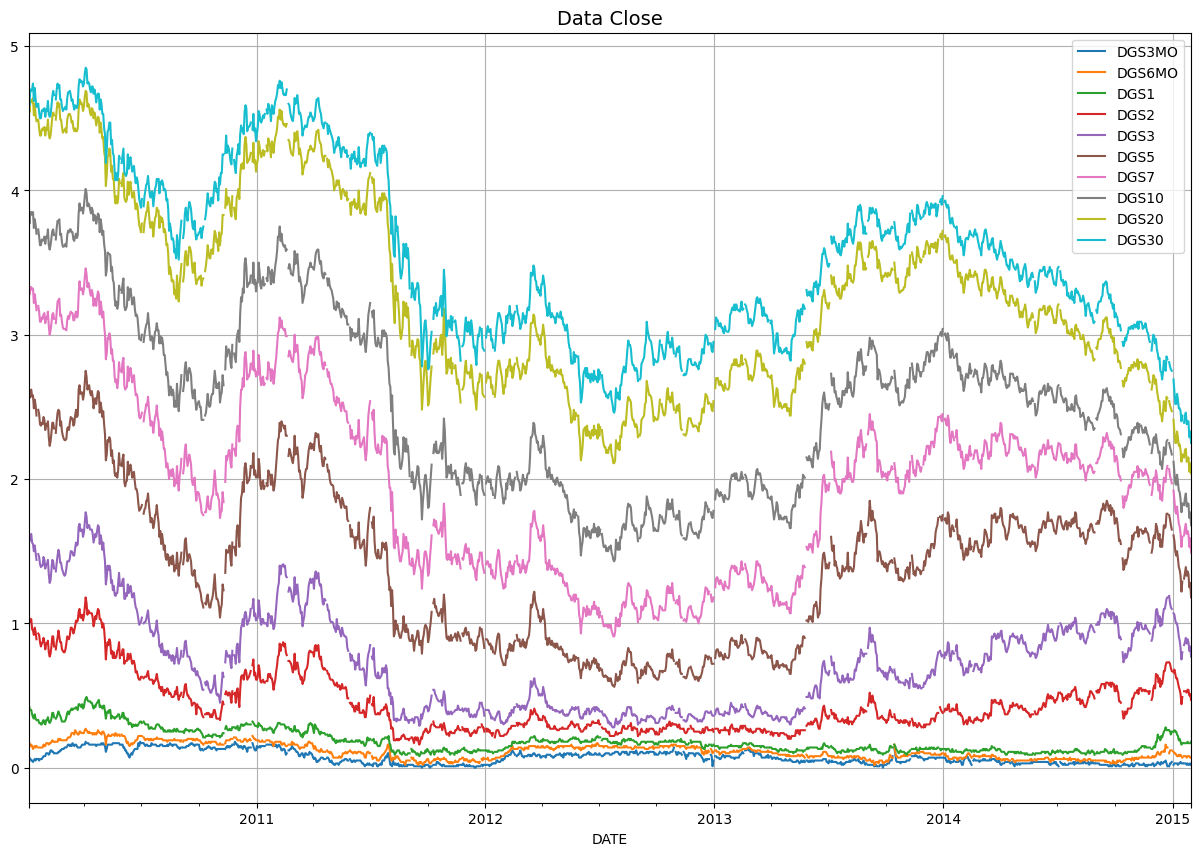

In [4]:
USyields2.plot(figsize = (15, 10), grid = True)
plt.title('Data Close', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Treasury Yields Time Series')

<Figure size 800x600 with 0 Axes>

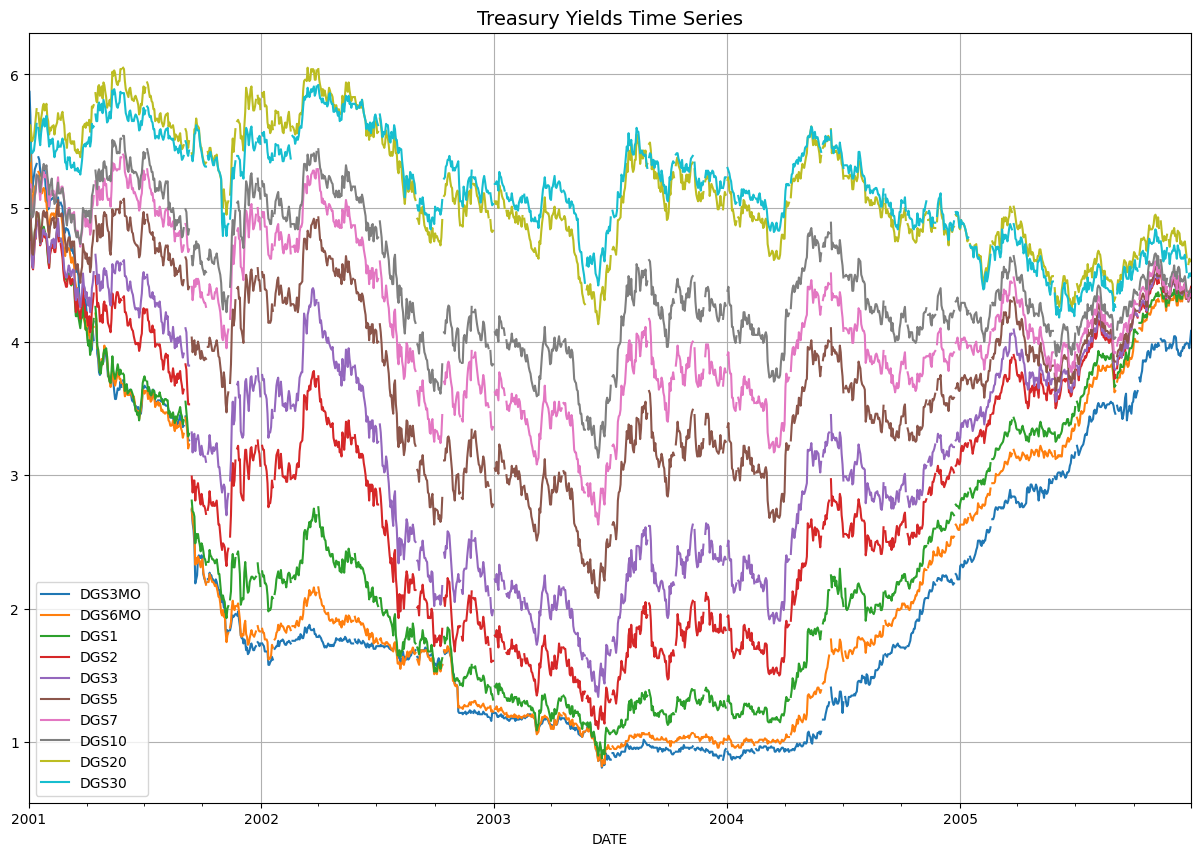

In [5]:
plt.figure(1, figsize=(8,6))
USyields['2001-01-01':'2005-12-31'].plot(figsize = (15, 10), grid = True)
plt.title('Treasury Yields Time Series', fontsize=14)
#plt.savefig("TreasuryYields")

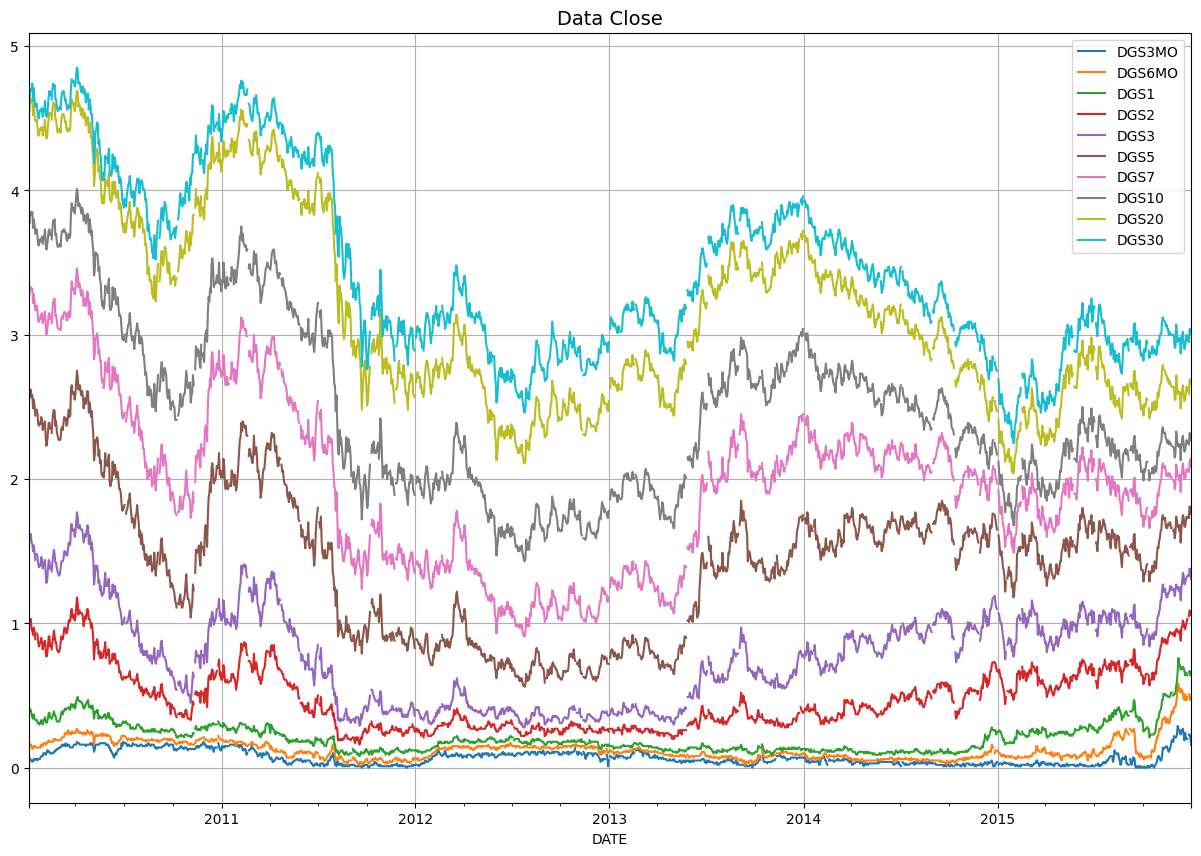

In [6]:
USyields['2010-01-02':'2015-12-31'].plot(figsize = (15, 10), grid = True)
plt.title('Data Close', fontsize=14)
plt.show()

In [7]:
yieldCurve1 = np.zeros(10)
yieldCurve2 = np.zeros(10)
yieldCurve3 = np.zeros(10)
yieldMean = np.zeros(10)

yT = USyields['2001-01-01':'2005-12-31'].dropna()

for i in range(10):
    yieldCurve1[i] = yT.loc['2001-01-02'][i]
    yieldCurve2[i] = yT.loc['2002-12-04'][i]
    yieldCurve3[i] = yT.loc['2005-12-30'][i]
    yieldMean[i] = yT.iloc[i].mean()

mat = [0.3,0.5,1,2,3,5,7,10,20,30]

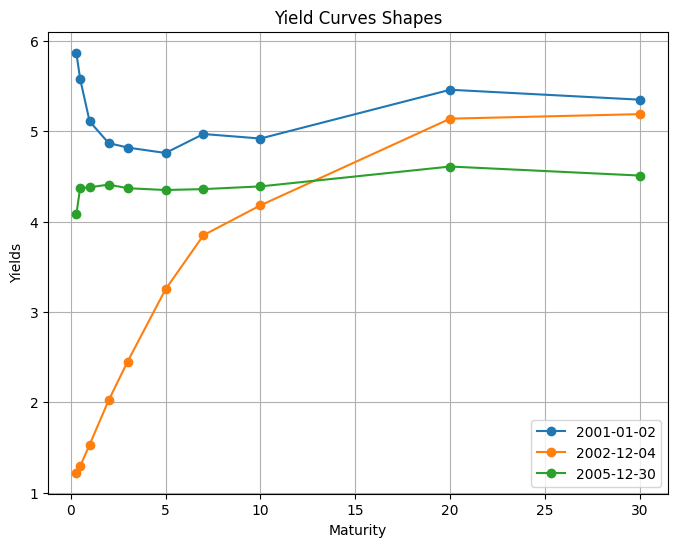

In [8]:
plt.figure(1, figsize=(8,6))
plt.plot(mat, yieldCurve1, marker ='o', label = '2001-01-02')
plt.plot(mat, yieldCurve2, marker ='o', label = '2002-12-04')
plt.plot(mat, yieldCurve3, marker ='o', label = '2005-12-30')
plt.legend()
plt.title("Yield Curves Shapes")
plt.xlabel("Maturity")
plt.ylabel("Yields")
plt.grid()
#plt.savefig("Yield Curves")

In [9]:
scale_function = lambda x:(x-x.mean())/(x.max()-x.min())

data1 = USyields['2001-01-01':'2005-12-31']
data1 = data1.diff().dropna()

In [10]:
yieldChangeMean = np.zeros(10)
for i in range(10):
    yieldChangeMean[i] = data1.iloc[i].mean()


In [11]:
scale_data = data1.apply(scale_function).dropna()
scale_data.head()

,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,
2001-01-03,-0.386617,-0.363321,-0.151678,0.097125,0.178147,0.349542,0.432766,0.482310,0.415505,0.267855
2001-01-04,-0.690965,-0.626479,-0.485011,-0.280233,-0.242906,-0.227381,-0.220295,-0.235082,-0.148597,-0.090636
2001-01-05,-0.538791,-0.573848,-0.485011,-0.393441,-0.365713,-0.304304,-0.281520,-0.213343,-0.148597,-0.052900
2001-01-08,0.156861,0.136679,0.026100,-0.034950,-0.032380,-0.015843,0.024603,0.025788,0.056531,0.022572
2001-01-09,0.113383,0.215626,0.226100,0.191465,0.178147,0.157234,0.085827,0.091005,0.030890,0.022572


<Figure size 800x600 with 0 Axes>

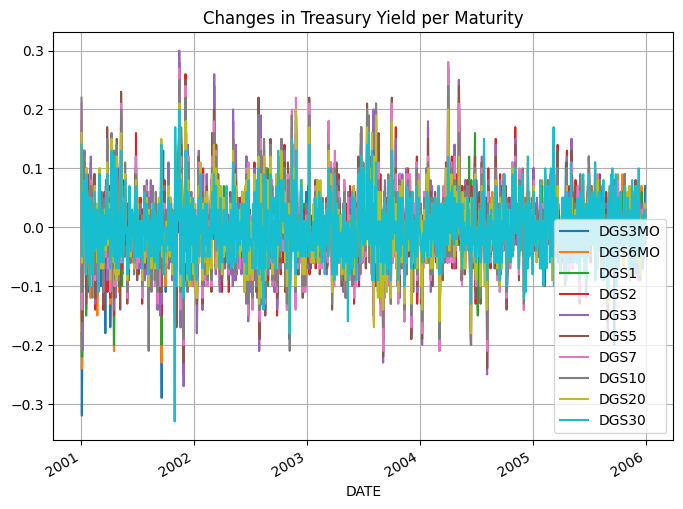

In [12]:
plt.figure(1, figsize=(8,6))
data1.plot(figsize=(8,6))
plt.title("Changes in Treasury Yield per Maturity")
plt.grid()
#plt.savefig("ChangesYield")

In [13]:
data1.corr()

,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DGS3MO,1.000000,0.778884,0.590073,0.423893,0.393075,0.355049,0.307006,0.284348,0.215542,0.175523
DGS6MO,0.778884,1.000000,0.847988,0.673436,0.630754,0.578333,0.528785,0.493625,0.411062,0.334880
DGS1,0.590073,0.847988,1.000000,0.868197,0.826127,0.775102,0.732362,0.697064,0.616970,0.502430
DGS2,0.423893,0.673436,0.868197,1.000000,0.970324,0.917696,0.882556,0.843803,0.766421,0.626203
DGS3,0.393075,0.630754,0.826127,0.970324,1.000000,0.953792,0.921489,0.889024,0.815440,0.679666
DGS5,0.355049,0.578333,0.775102,0.917696,0.953792,1.000000,0.972980,0.952156,0.895104,0.766849
DGS7,0.307006,0.528785,0.732362,0.882556,0.921489,0.972980,1.000000,0.978324,0.941848,0.821792
DGS10,0.284348,0.493625,0.697064,0.843803,0.889024,0.952156,0.978324,1.000000,0.959349,0.855934
DGS20,0.215542,0.411062,0.616970,0.766421,0.815440,0.895104,0.941848,0.959349,1.000000,0.895758
DGS30,0.175523,0.334880,0.502430,0.626203,0.679666,0.766849,0.821792,0.855934,0.895758,1.000000


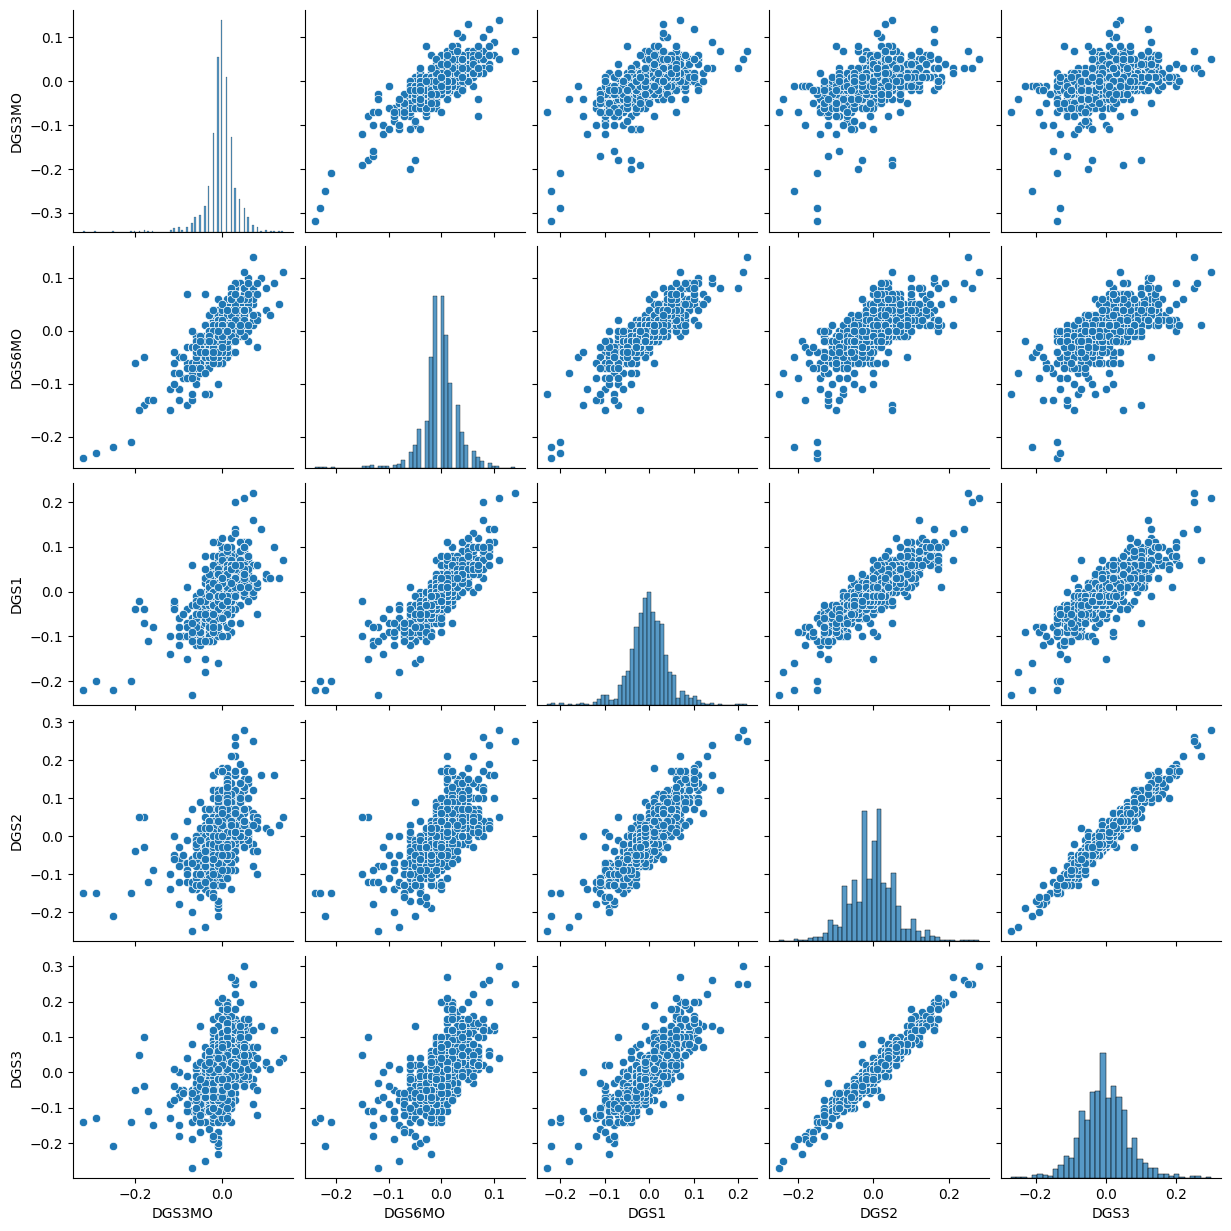

In [14]:
import seaborn as sns
sns.pairplot(data1[['DGS3MO','DGS6MO','DGS1','DGS2','DGS3']])


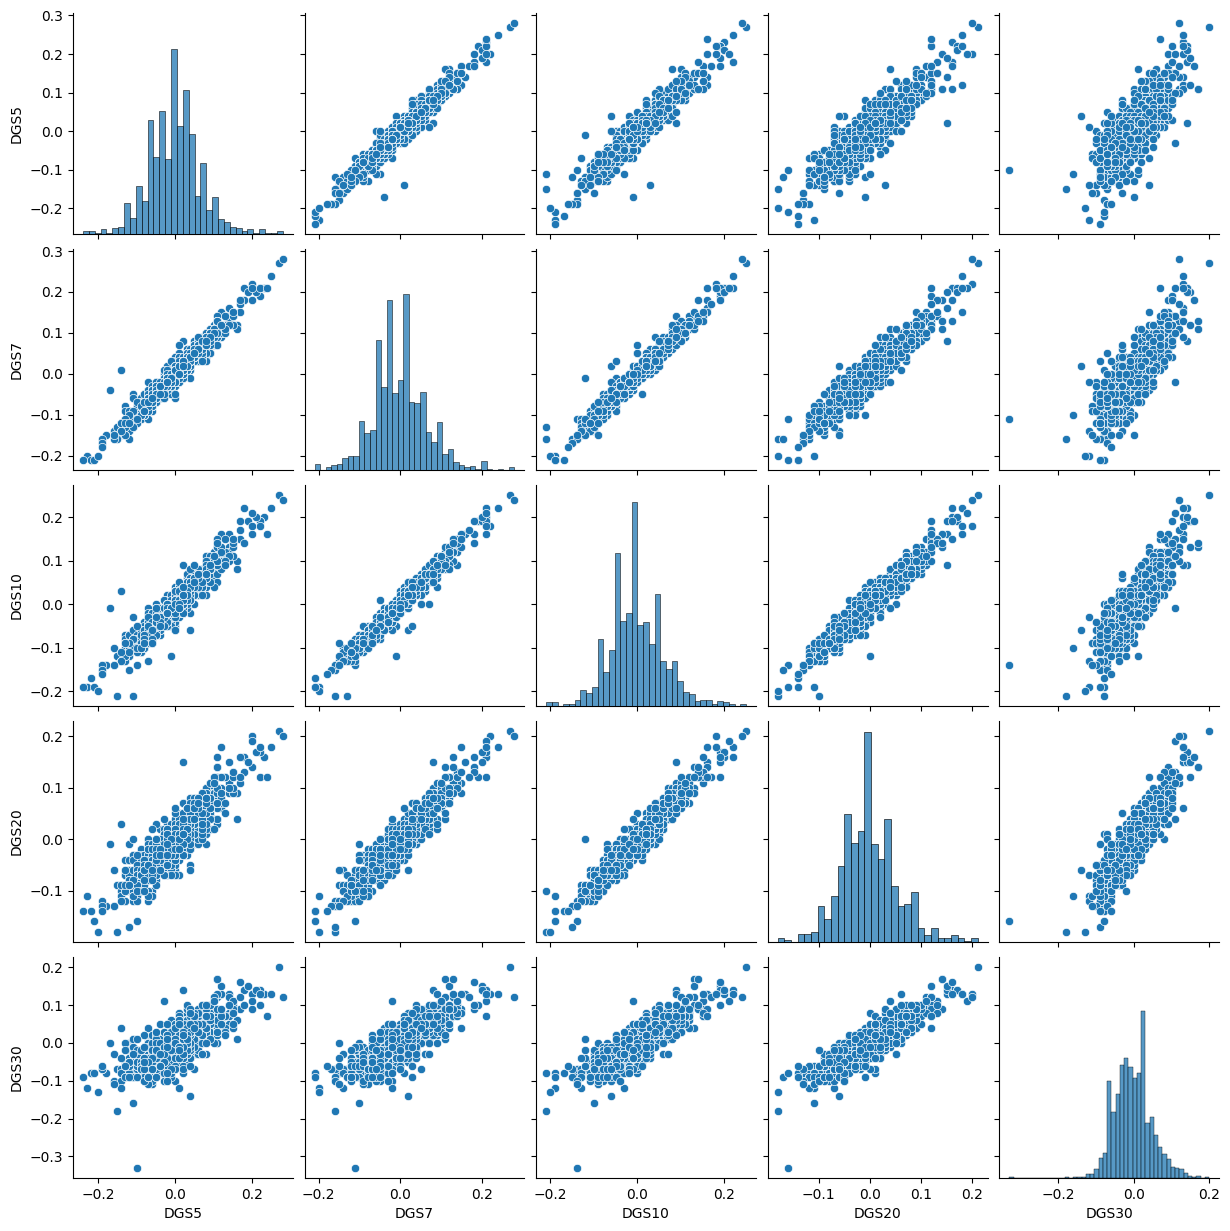

In [15]:
sns.pairplot(data1[['DGS5','DGS7','DGS10','DGS20','DGS30']])

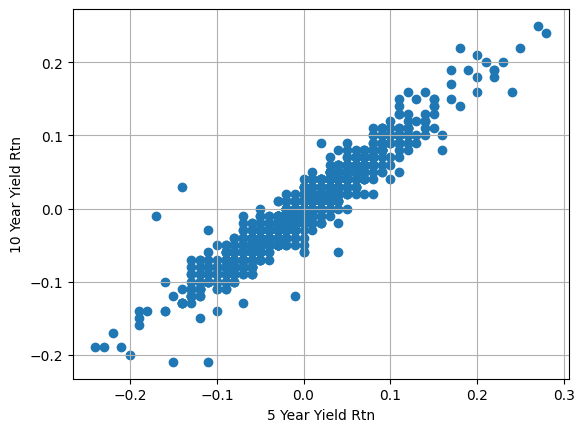

In [16]:
plt.scatter(data1['DGS5'],data1['DGS10'])
plt.xlabel('5 Year Yield Rtn')
plt.ylabel('10 Year Yield Rtn')
plt.grid()
#plt.savefig('PCA Example 1')

1.0


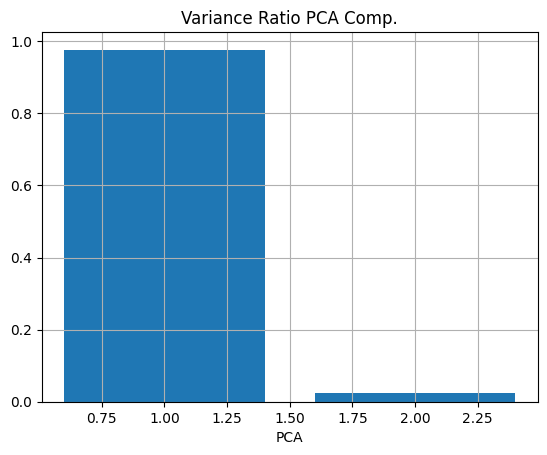

In [17]:
test = data1[['DGS5', 'DGS10']]

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(test)
len(pca.explained_variance_ratio_)

temp = np.linspace(1,2,2)
print(np.sum(pca.explained_variance_ratio_))
plt.bar(temp, pca.explained_variance_ratio_)
plt.title("Variance Ratio PCA Comp.")
plt.xlabel('PCA')
plt.grid()
#plt.savefig("PCA_Var_Ratio")

In [18]:
pca.components_

array([[ 0.73951008,  0.67314549],
       [-0.67314549,  0.73951008]])

In [19]:
pca.explained_variance_ratio_

array([0.97627346, 0.02372654])

In [20]:
(pca.components_[0][0])**2+ (pca.components_[0][1])**2

0.9999999999999999

In [21]:
(pca.components_[1][0])**2+ (pca.components_[1][1])**2

0.9999999999999999

In [22]:
np.inner(pca.components_[0],pca.components_[1])

0.0

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(data1)


PCA(n_components=10)

In [24]:
len(pca.explained_variance_ratio_)

10

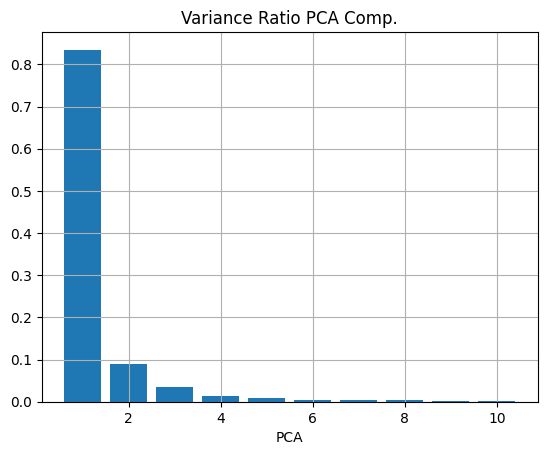

In [25]:
temp = np.linspace(1,10,10)
plt.bar(temp, pca.explained_variance_ratio_)
plt.title("Variance Ratio PCA Comp.")
plt.xlabel('PCA')
plt.grid()
#plt.savefig("PCA_Var_Ratio")

In [26]:
pca = PCA(n_components = 3)
pca.fit(data1)
print(np.sum(pca.explained_variance_ratio_))

0.960264740118615


In [27]:
pca.components_

array([[ 0.08578374,  0.13713112,  0.23240495,  0.37098125,  0.40328448,
         0.40957703,  0.39602489,  0.36776963,  0.31302466,  0.24845662],
       [-0.43235464, -0.4299252 , -0.40958164, -0.28170423, -0.17470016,
         0.02971695,  0.16393851,  0.2340053 ,  0.33587391,  0.39404384],
       [-0.56810508, -0.3490198 , -0.09559655,  0.35648711,  0.35595623,
         0.13759274,  0.01309489, -0.09739724, -0.21241016, -0.46776881]])

In [28]:
pca.explained_variance_

array([0.02592351, 0.00280513, 0.00109178])

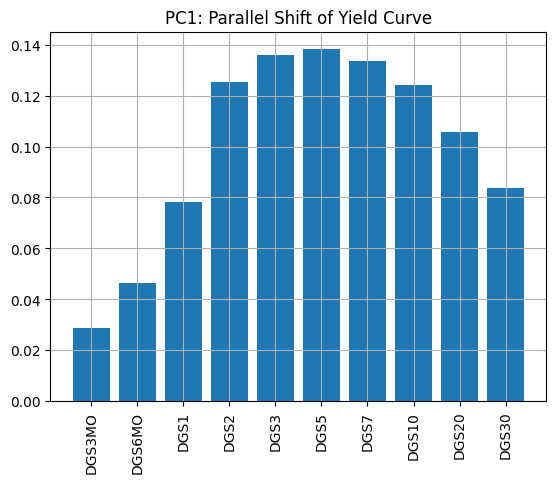

In [29]:
s1 = pca.components_[0].sum()
w1 = pca.components_[0]/np.abs(s1)
plt.bar(symbols, w1)
plt.xticks(rotation=90);
plt.title("PC1: Parallel Shift of Yield Curve")
plt.grid()
#plt.savefig("PCA1Eigen_1")

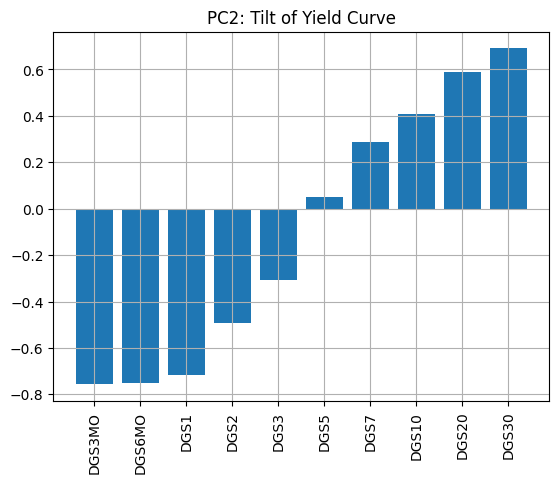

In [30]:
s2 = pca.components_[1].sum()
w2 = pca.components_[1]/np.abs(s2)
plt.bar(symbols, w2)
plt.xticks(rotation=90)
plt.title("PC2: Tilt of Yield Curve")
plt.grid()
#plt.savefig("PCA2Eigen_1")

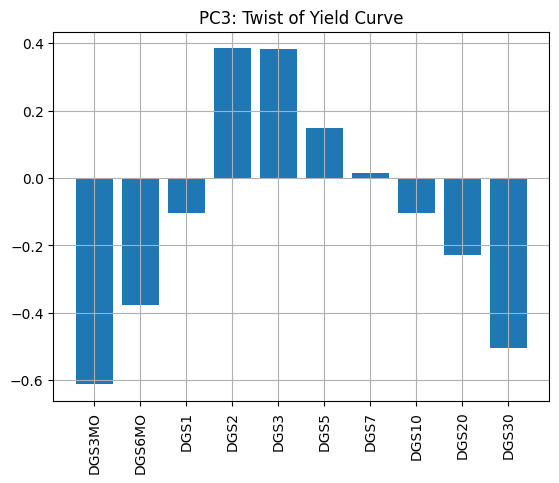

In [31]:
s3 = pca.components_[2].sum()
w3 = pca.components_[2]/np.abs(s3)
plt.bar(symbols, w3)
plt.xticks(rotation=90);
plt.title("PC3: Twist of Yield Curve")
plt.grid()
#plt.savefig("PCA3Eigen_1")

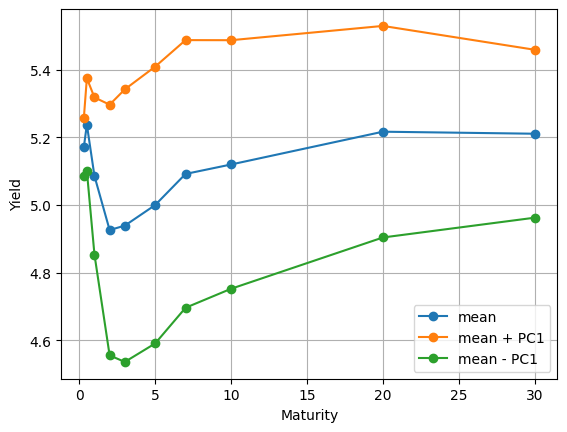

In [32]:
plt.plot(mat,yieldMean, marker = 'o', label = "mean")
plt.plot(mat,yieldMean+pca.components_[0], marker = 'o', label = "mean + PC1")
plt.plot(mat,yieldMean-pca.components_[0],marker = 'o', label = "mean - PC1")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.legend()
plt.grid()
#plt.savefig('Parallel')

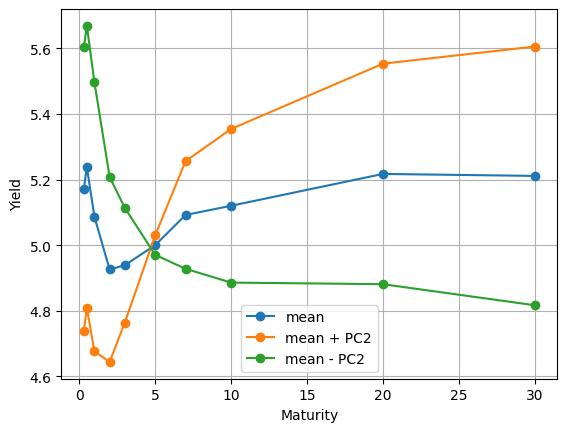

In [33]:
plt.plot(mat,yieldMean, marker = 'o', label = "mean")
plt.plot(mat,yieldMean+pca.components_[1], marker = 'o', label = "mean + PC2")
plt.plot(mat,yieldMean-pca.components_[1],marker = 'o', label = "mean - PC2")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.legend()
plt.grid()
#plt.savefig('Tilt')

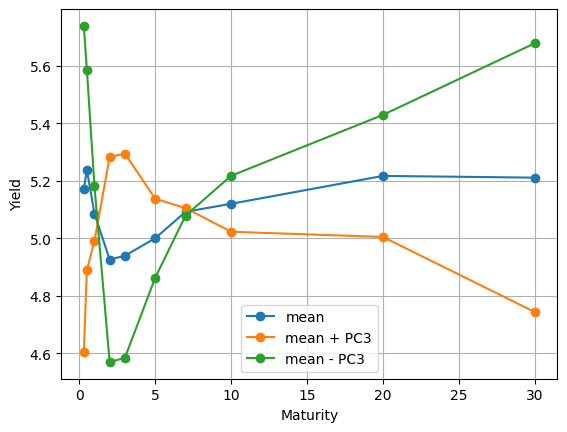

In [34]:
plt.plot(mat,yieldMean, marker = 'o', label = "mean")
plt.plot(mat,yieldMean+pca.components_[2], marker = 'o', label = "mean + PC3")
plt.plot(mat,yieldMean-pca.components_[2], marker = 'o',label = "mean - PC3")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.legend()
plt.grid()
#plt.savefig('Twist')